In [1]:
import math
import sys
sys.path.append('C:/Users/Gabzer/Desktop/Mestrado/Neural_Networks/')
from Perceptron import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Métodos para o Backpropagation
def erroTotal(results, saidas):
    result = 0
    for i in range(len(results)):
        result += 1 / 2 * (saidas[i] - results[i]) ** 2
    return result

#servem para a última camada
#derivada
def derivada(saida_desejada, funcao_ativacao1, funcao_ativacao2):
    return -(saida_desejada - funcao_ativacao1) * funcao_ativacao1 * (1 - funcao_ativacao1) * funcao_ativacao2
#valor t + 1 do peso
def novoPeso(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso

#outras camadas
def derivada2(saida_desejada, funcao_ativacao):
    return -(saida_desejada - funcao_ativacao) * funcao_ativacao * (1 - funcao_ativacao)
    
def derivada3(peso, derivada, funcao_ativacao):
    return (peso[0] * derivada[0] + peso[1] * derivada[1]) * funcao_ativacao * (1 - funcao_ativacao)

def novoPeso2(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso * saida_desejada

In [3]:
epocas = 1001
count = 0
saidas = [0.01, 0.99]     # y1 e y2
pesos = [[0.15, 0.2],     # w1 e w2
        [0.25, 0.3],      # w3 e w4
        [0.4, 0.45],      # w5 e w6
        [0.5, 0.55]]      # w7 e w8
listE_total = []
listCount = []

while count < epocas:
    
############################################################################################################################
###                                                   CAMADA 1                                                           ###
############################################################################################################################
    #Perceptron H1
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h1 = Perceptron(entradas, pesos[0], bias)    
    #Perceptron H2
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h2 = Perceptron(entradas, pesos[1], bias)    
    #Resultado dos Somatórios
    uh1 = perceptron_h1.somatorio()
    uh2 = perceptron_h2.somatorio()    
    #Resultado das funções de ativação
    h1 = perceptron_h1.sigmoide(uh1)
    h2 = perceptron_h2.sigmoide(uh2)    
############################################################################################################################
###                                                   CAMADA 2                                                           ###
############################################################################################################################
    #Perceptron O1
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o1 = Perceptron(entradas, pesos[2], bias)    
    #Perceptron O2
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o2 = Perceptron(entradas, pesos[3], bias)    
    #Resultado dos Somatórios
    uo1 = perceptron_o1.somatorio()
    uo2 = perceptron_o2.somatorio()    
    #Resultado das funções de ativação
    o1 = perceptron_o1.sigmoide(uo1)
    o2 = perceptron_o2.sigmoide(uo2)    
    ###################################################################
    #finaliza o loop se o resultado da sigmoide é = as saídas desejadas
    if o1 == saidas[0] and o2 == saidas[1]:
        print('Resolvido!')
        break
    else:
        print('Resultado:' + str(o1) + ' e ' + str(o2) + 'Uops... Reajustar')
    ###################################################################    
    results = [o1, o2]
    E_total = erroTotal(results, saidas)
    print('Erro total da rede: ' + str(E_total))    
    
####################################################### CORRIGINDO #########################################################
    ###Camada 2###
    #calcula a derivada de w5
    d_w5 = derivada(0.01, o1, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w5
    w5_novo = novoPeso(perceptron_o1.pesos[0], taxa_aprendizado, d_w5)
    
    #calcula a derivada de w6
    d_w6 = derivada(0.01, o1, h2)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w6
    w6_novo = novoPeso(perceptron_o1.pesos[1], taxa_aprendizado, d_w6)
    
    #calcula a derivada de w7
    d_w7 = derivada(0.99, o2, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w7
    w7_novo = novoPeso(perceptron_o2.pesos[0], taxa_aprendizado, d_w7)
    
    #calcula a derivada de w8
    d_w8 = derivada(0.99, o2, 0.05)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w8
    w8_novo = novoPeso(perceptron_o2.pesos[1], taxa_aprendizado, d_w8)
    
    
    ###Camada 1###
    #d_o1 = -(y1 - go1) * go1 * (1 - go1)
    d_o1 = -(saidas[0] - o1) * o1 * (1 - o1)
    
    #d_h1 = (w5 * d_o1 + w2 * d_o1) * gh1 * (1 - gh1)
    d_h1 = (perceptron_o1.pesos[1] * d_o1 + perceptron_h1.pesos[1] * d_o1) * h1 * (1 - h1)
    
    w1_novo = perceptron_h1.pesos[0] - d_h1 * saidas[0]
    
    #w2(t + 1) = w2(t) - d_h1 * y1
    w2_novo = perceptron_h1.pesos[1] - d_h1 * saidas[0]
    
    #d_o2 = -(y2 - go2) * go2 * (1 - go2)
    d_o2 = -(saidas[1] - o2) * o2 * (1 - o2)
    
    #d_h2 = (w6 * d_o1 + w8 * d_o2) * gh2 * (1 - gh2)
    d_h2 = (perceptron_o1.pesos[1] * d_o1 + perceptron_o2.pesos[1] * d_o2) * h2 * (1 - h2)
    
    #w3(t + 1) = w3(t) - d_h2 * y2
    w3_novo = perceptron_h2.pesos[0] - d_h2 * saidas[1]
    
    #w4(t + 1) = w4(t) - d_h2 * y2
    w4_novo = perceptron_h2.pesos[1] - d_h2 * saidas[1]
    
    
    #os pesos sinápticos reajustados são postos em seus lugares para a nova iteração
    pesos = [[w1_novo, w2_novo],     # w1 e w2
            [w3_novo, w4_novo],      # w3 e w4
            [w5_novo, w6_novo],      # w5 e w6
            [w7_novo, w8_novo]]      # w7 e w8
    
    listE_total.append(E_total)
    listCount.append(count)
    print(count)
    count += 1
    print('====================================================================')

Resultado:0.7513650695523157 e 0.7729284653214625Uops... Reajustar
Erro total da rede: 0.2983711087600027
0
Resultado:0.742061826218241 e 0.7741674862336226Uops... Reajustar
Erro total da rede: 0.29124909570234975
1
Resultado:0.7324337830322526 e 0.775393522502123Uops... Reajustar
Erro total da rede: 0.2839832555251693
2
Resultado:0.722488357021748 e 0.7766070762897396Uops... Reajustar
Erro total da rede: 0.27658809939058143
3
Resultado:0.7122360099404723 e 0.777808622131537Uops... Reajustar
Erro total da rede: 0.26908029724941596
4
Resultado:0.7016903801465391 e 0.7789986034700868Uops... Reajustar
Erro total da rede: 0.2614785856624187
5
Resultado:0.6908683473910429 e 0.7801774293425067Uops... Reajustar
Erro total da rede: 0.2538036088181643
6
Resultado:0.6797900191634729 e 0.7813454713645028Uops... Reajustar
Erro total da rede: 0.24607769104555344
7
Resultado:0.6684786298788068 e 0.7825030611609451Uops... Reajustar
Erro total da rede: 0.23832454281732454
8
Resultado:0.656960347885797

102
Resultado:0.16347904465458094 e 0.8529258738541542Uops... Reajustar
Erro total da rede: 0.021172566603365046
103
Resultado:0.16228037945033424 e 0.8533695954019627Uops... Reajustar
Erro total da rede: 0.020928590713080578
104
Resultado:0.16110368149281665 e 0.8538096011450185Uops... Reajustar
Erro total da rede: 0.020690073650480763
105
Resultado:0.1599483424482058 e 0.8542459408818076Uops... Reajustar
Erro total da rede: 0.020456834985015035
106
Resultado:0.1588137759043149 e 0.8546786635022443Uops... Reajustar
Erro total da rede: 0.020228702005219236
107
Resultado:0.15769941641938426 e 0.8551078170080372Uops... Reajustar
Erro total da rede: 0.02000550932148193
108
Resultado:0.1566047186180969 e 0.8555334485325641Uops... Reajustar
Erro total da rede: 0.01978709849231798
109
Resultado:0.15552915633224587 e 0.8559556043602636Uops... Reajustar
Erro total da rede: 0.019573317672598713
110
Resultado:0.15447222178362421 e 0.8563743299455489Uops... Reajustar
Erro total da rede: 0.0193640

327
Resultado:0.07343432841436659 e 0.9054990882376567Uops... Reajustar
Erro total da rede: 0.005582159055024524
328
Resultado:0.07329454561879681 e 0.9056250841020045Uops... Reajustar
Erro total da rede: 0.005562662968941883
329
Resultado:0.07315551763156346 e 0.9057505909735033Uops... Reajustar
Erro total da rede: 0.0055432911643123325
330
Resultado:0.073017237943085 e 0.9058756119196815Uops... Reajustar
Erro total da rede: 0.005524042473931715
331
Resultado:0.07287970012042536 e 0.9060001499816162Uops... Reajustar
Erro total da rede: 0.0055049157451728
332
Resultado:0.0727428978061544 e 0.9061242081742236Uops... Reajustar
Erro total da rede: 0.005485909839757259
333
Resultado:0.07260682471722865 e 0.9062477894865438Uops... Reajustar
Erro total da rede: 0.005467023633532035
334
Resultado:0.07247147464389246 e 0.9063708968820239Uops... Reajustar
Erro total da rede: 0.00544825601624979
335
Resultado:0.07233684144859835 e 0.9064935332987953Uops... Reajustar
Erro total da rede: 0.0054296

581
Resultado:0.05206100083327747 e 0.9271720531515705Uops... Reajustar
Erro total da rede: 0.0028582393481430264
582
Resultado:0.05200963061559776 e 0.9272303729828592Uops... Reajustar
Erro total da rede: 0.002852417570164973
583
Resultado:0.0519584114588887 e 0.9272885528044895Uops... Reajustar
Erro total da rede: 0.0028466169507543504
584
Resultado:0.051907342647101 e 0.9273465931634252Uops... Reajustar
Erro total da rede: 0.002840837377985446
585
Resultado:0.051856423468851394 e 0.92740449460368Uops... Reajustar
Erro total da rede: 0.0028350787407122684
586
Resultado:0.05180565321738377 e 0.9274622576663387Uops... Reajustar
Erro total da rede: 0.0028293409285617796
587
Resultado:0.051755031190531146 e 0.9275198828895775Uops... Reajustar
Erro total da rede: 0.0028236238319271664
588
Resultado:0.05170455669067788 e 0.9275773708086833Uops... Reajustar
Erro total da rede: 0.002817927341961294
589
Resultado:0.05165422902472203 e 0.927634721956074Uops... Reajustar
Erro total da rede: 0.0

862
Resultado:0.0417630120485515 e 0.9395094013152333Uops... Reajustar
Erro total da rede: 0.0017790947449712953
863
Resultado:0.04173670171850164 e 0.9395426187258469Uops... Reajustar
Erro total da rede: 0.001776582780507201
864
Resultado:0.04171044261113544 e 0.9395757802457033Uops... Reajustar
Erro total da rede: 0.0017740770542118585
865
Resultado:0.041684234565110764 e 0.9396088860284039Uops... Reajustar
Erro total da rede: 0.0017715775436376751
866
Resultado:0.04165807741978619 e 0.939641936226966Uops... Reajustar
Erro total da rede: 0.0017690842264430663
867
Resultado:0.041631971015217095 e 0.939674930993825Uops... Reajustar
Erro total da rede: 0.0017665970803919023
868
Resultado:0.04160591519215206 e 0.9397078704808384Uops... Reajustar
Erro total da rede: 0.001764116083352818
869
Resultado:0.04157990979202883 e 0.9397407548392872Uops... Reajustar
Erro total da rede: 0.0017616412132986548
870
Resultado:0.04155395465697063 e 0.9397735842198804Uops... Reajustar
Erro total da rede:

<function matplotlib.pyplot.show>

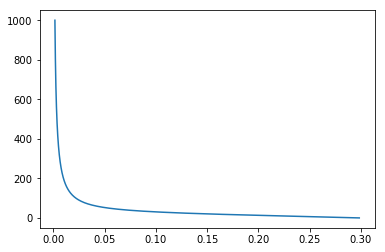

In [4]:
plt.plot(listE_total, listCount)
plt.show